In [97]:
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils.perspective import four_point_transform

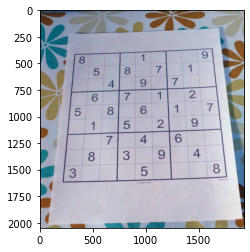

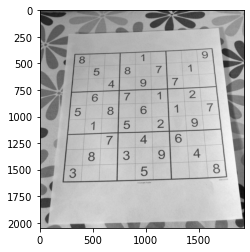

In [98]:
img = cv2.imread('input\sudoku1.jpg')
original_img = img.copy()
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show()

plt.imshow(gray_img, cmap='gray')
plt.show()

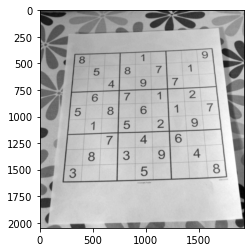

In [99]:
img_blurred = cv2.GaussianBlur(gray_img, (7, 7), 3)

plt.imshow(img_blurred, cmap='gray')


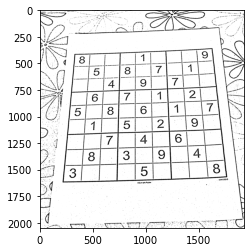

In [100]:
thresh = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresh, cmap='gray')

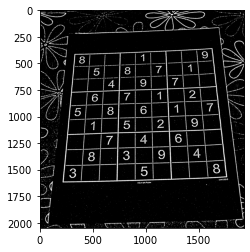

In [101]:
thresh = 255 - thresh

plt.imshow(thresh, cmap='gray')

In [102]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = contours[0]

In [103]:
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [104]:
sudoku_contour = None

In [105]:
for contour in contours:
    
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        sudoku_contour = approx
        break
    
if sudoku_contour is None:
    print("Can't find any Sudoku, Try again")

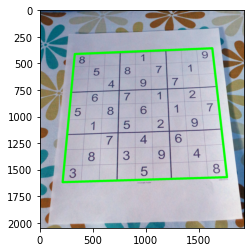

In [106]:
result = cv2.drawContours(img, [sudoku_contour], -1, (0, 255, 0), 20)

plt.imshow(result)

True

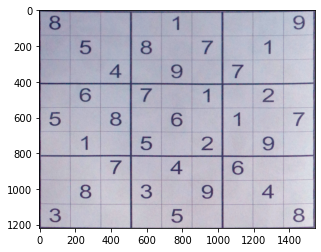

In [107]:
warped = four_point_transform(original_img, sudoku_contour.reshape(4, 2))

plt.imshow(warped)
cv2.imwrite('output\sudoku1.jpg', warped)